In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Preprocess input images
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [5]:
base_model.trainable = False

In [6]:
# Step (c): Add custom classifier
# ----------------------------
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

In [7]:
# Step (d): Compile and Train model
# ----------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
# Train only the top classifier layers
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=1,
    batch_size=64
)

782/782 ━━━━━━━━━━━━━━━━━━━━ 732s 932ms/step - accuracy: 0.4428 - loss: 2.7321 - val_accuracy: 0.5801 - val_loss: 1.2219


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 126s 401ms/step - accuracy: 0.5801 - loss: 1.2219

Test Accuracy: 58.01%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


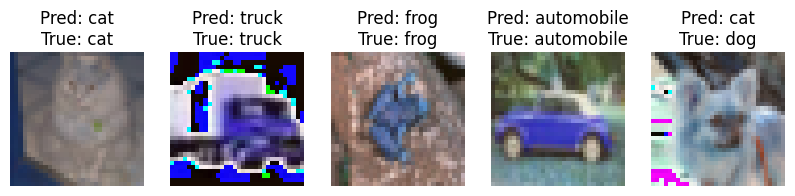

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# pick 5 random images from test set
indices = np.random.choice(len(x_test), 5)
sample_images = x_test[indices]
sample_labels = np.argmax(y_test[indices], axis=1)

# make predictions
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# show images with prediction
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow((sample_images[i] + 127.5).astype('uint8'))  # reverse preprocessing
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[sample_labels[i]]}")
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


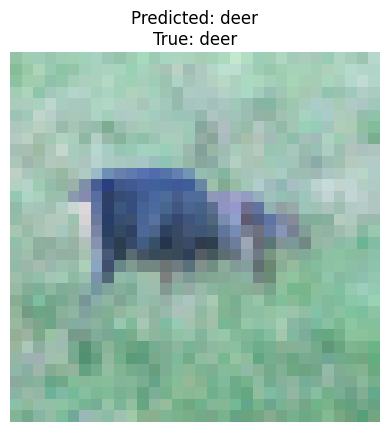

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Pick 1 random image from the test set
index = np.random.randint(len(x_test))
image = x_test[index]
true_label = np.argmax(y_test[index])

# Make prediction
pred = model.predict(np.expand_dims(image, axis=0))   # add batch dimension
predicted_class = np.argmax(pred)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Show image with predicted and true label
plt.imshow((image + 127.5).astype('uint8'))
plt.title(f"Predicted: {class_names[predicted_class]}\nTrue: {class_names[true_label]}")
plt.axis('off')
plt.show()


# 